In [1]:
# 导入MindSpore
import mindspore

#导入了 InteractiveShell 类并设置了 ast_node_interactivity 属性为 "all"。这样可以使得 Jupyter notebook 的每个 cell 可以输出多行结果。
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
from mindspore import Tensor
from mindspore import dtype
# 用数组创建张量
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)
x   

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

In [2]:
# 用数值创建张量
y = Tensor(1.0, dtype.int32)
z = Tensor(2, dtype.int32)
y
z

Tensor(shape=[], dtype=Int32, value= 1)

Tensor(shape=[], dtype=Int32, value= 2)

In [3]:
# 创建一个 bool_ 类型的张量 m，其值为 True。
m = Tensor(True, dtype.bool_)
m

Tensor(shape=[], dtype=Bool, value= True)

In [4]:
# 用tuple创建张量
n = Tensor((1, 2, 3), dtype.int16)
n

Tensor(shape=[3], dtype=Int16, value= [1, 2, 3])

In [5]:
# 用list创建张量
p = Tensor([4.0, 5.0, 6.0], dtype.float64)
p

Tensor(shape=[3], dtype=Float64, value= [ 4.00000000e+00,  5.00000000e+00,  6.00000000e+00])

In [6]:
from mindspore import ops
# 创建一个 OnesLike 对象，这个对象可以创建一个与输入张量具有相同形状的新张量，其中所有元素的值都是1。
oneslike = ops.OnesLike()
x = Tensor(np.array([[0, 1], [2, 1]]).astype(np.int32))
output = oneslike(x)
output

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 1],
 [1, 1]])

In [8]:
from mindspore.ops import operations as ops

#定义张量形状
shape = (2, 2)
ones = ops.Ones()
output = ones(shape,dtype.float32)
print(output)

zeros = ops.Zeros()
output = zeros(shape, dtype.float32)
print(output)

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]


In [9]:
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)

x.shape # 形状
x.dtype # 数据类型
x.ndim  # 维度
x.size  # 大小

(2, 2)

mindspore.int32

2

4

In [9]:
y = Tensor(np.array([[True, True], [False, False]]), dtype.bool_)

# 将Tensor数据类型转换成NumPy
y_array = y.asnumpy()

y
y_array 

Tensor(shape=[2, 2], dtype=Bool, value=
[[ True,  True],
 [False, False]])

array([[ True,  True],
       [False, False]])

In [10]:
tensor = Tensor(np.array([[0, 1], [2, 3]]).astype(np.float32))
print("First row: {}".format(tensor[0]))
print("First column: {}".format(tensor[:, 0]))
print("Last column: {}".format(tensor[..., -1]))

First row: [0. 1.]
First column: [0. 2.]
Last column: [1. 3.]


In [11]:
data1 = Tensor(np.array([[0, 1], [2, 3]]).astype(np.float32))
data2 = Tensor(np.array([[4, 5], [6, 7]]).astype(np.float32))
# 创建一个Stack操作，用于将多个Tensor沿新的轴堆叠
op = ops.Stack()
# 使用Stack操作将data1和data2堆叠起来，形成一个新的Tensor
output = op([data1, data2])
print(output)

[[[0. 1.]
  [2. 3.]]

 [[4. 5.]
  [6. 7.]]]


In [12]:
zeros = ops.Zeros()
# 使用Zeros操作创建一个形状为(2, 2)的全零Tensor，数据类型为float32
output = zeros((2,2), dtype.float32)
print("output: {}".format(type(output)))
n_output = output.asnumpy()
print("n_output: {}".format(type(n_output)))

output: <class 'mindspore.common._stub_tensor.StubTensor'>
n_output: <class 'numpy.ndarray'>


<Figure size 800x800 with 0 Axes>

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

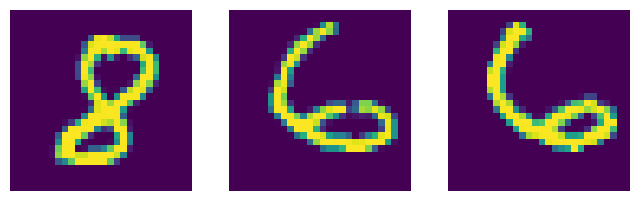

In [13]:
import os
import mindspore.dataset as ds
import matplotlib.pyplot as plt

dataset_dir = "./data/MNIST_Data/train"  # 数据集路径
# 从mnist dataset读取3张图片
mnist_dataset = ds.MnistDataset(dataset_dir=dataset_dir, num_samples=3)
# 查看图像，设置图像大小
plt.figure(figsize=(8,8))
i = 1

# 打印3张子图
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    # 在3x3的网格中创建子图
    plt.subplot(3,3,i)
    # 显示图像
    plt.imshow(dic['image'][:,:,0])
    # 关闭坐标轴
    plt.axis('off')
    i +=1
plt.show() 

In [14]:
import numpy as np
np.random.seed(58)

class DatasetGenerator:
#实例化数据集对象时，__init__函数被调用，用户可以在此进行数据初始化等操作。
    def __init__(self):
        # 定义一个名为DatasetGenerator的数据集生成器类，其中包含两个属性：data和label
        self.data = np.random.sample((5, 2))
        self.label = np.random.sample((5, 1))
#定义数据集类的__getitem__函数，使其支持随机访问，能够根据给定的索引值index，获取数据集中的数据并返回。
    def __getitem__(self, index):
        return self.data[index], self.label[index]
#定义数据集类的__len__函数，返回数据集的样本数量。
    def __len__(self):
        return len(self.data)
    
# 创建一个DatasetGenerator实例
dataset_generator = DatasetGenerator()

# 使用MindSpore的GeneratorDataset接口创建一个数据集
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle=False)

# 遍历数据集并打印每个样本的数据和标签
for data in dataset.create_dict_iterator():
    print('{}'.format(data["data"]), '{}'.format(data["label"]))

[0.36510558 0.45120592] [0.78888122]
[0.49606035 0.07562207] [0.38068183]
[0.57176158 0.28963401] [0.16271622]
[0.30880446 0.37487617] [0.54738768]
[0.81585667 0.96883469] [0.77994068]


In [15]:
# 设置随机数种子
ds.config.set_seed(58)

# 对数据集进行混洗，设置缓存区大小为10
dataset = dataset.shuffle(buffer_size=10)
# 对数据集进行批处理，设置每个批次包含2个样本
dataset = dataset.batch(batch_size=2)

# 遍历批处理后的数据集并打印每个批次的数据和标签
for data in dataset.create_dict_iterator():
    print("data: {}".format(data["data"]))
    print("label: {}".format(data["label"]))

data: [[0.36510558 0.45120592]
 [0.57176158 0.28963401]]
label: [[0.78888122]
 [0.16271622]]
data: [[0.30880446 0.37487617]
 [0.49606035 0.07562207]]
label: [[0.54738768]
 [0.38068183]]
data: [[0.81585667 0.96883469]]
label: [[0.77994068]]


Text(0.5, 1.0, '5')

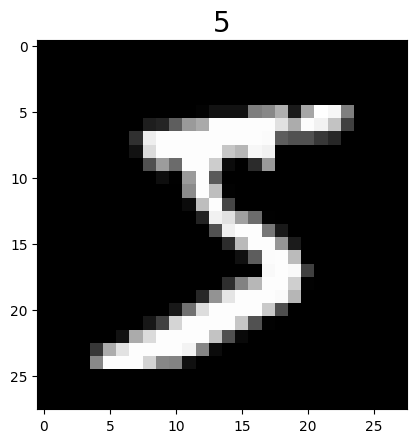

In [16]:
import matplotlib.pyplot as plt

# 从MindSpore的数据集vision模块导入插值方法
from mindspore.dataset.vision import Inter
# 导入MindSpore的vision.c_transforms模块，该模块包含许多计算机视觉领域的图像增强和预处理函数
import mindspore.dataset.vision.c_transforms as c_vision

DATA_DIR = './data/MNIST_Data/train'

# 创建一个MNIST数据集的实例，从指定的目录加载数据，不打乱数据顺序，只加载6个样本
mnist_dataset = ds.MnistDataset(DATA_DIR, num_samples=6, shuffle=False)

# 创建一个字典迭代器，用于遍历数据集中的样本
mnist_it = mnist_dataset.create_dict_iterator()

# 从迭代器中获取下一个元素，即一个样本
data = next(mnist_it)

## 显示样本的图像，将其转换为numpy数组，移除单维度条目，使用灰度图显示
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray)

# 设置标题为样本的标签，将标签转换为numpy数组，字体大小为20
plt.title(data['label'].asnumpy(), fontsize=20)
plt.show()

[WARNING] ME(41532:33096,MainProcess):2023-07-13-14:11:22.518.481 [mindspore\dataset\core\validator_helpers.py:806] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(41532:33096,MainProcess):2023-07-13-14:11:22.519.744 [mindspore\dataset\core\validator_helpers.py:806] 'RandomCrop' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'RandomCrop' from mindspore.dataset.vision instead.


Text(0.5, 1.0, '5')

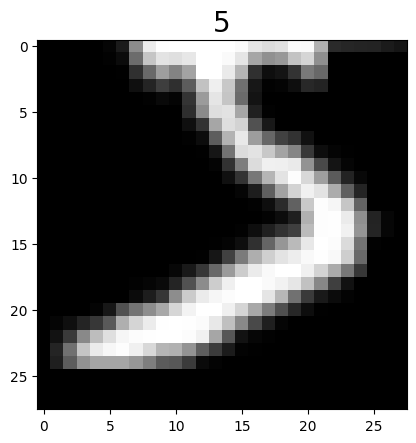

In [17]:
# 创建一个Resize操作，将图像尺寸调整为40x40，使用线性插值方法
resize_op = c_vision.Resize(size=(40,40), interpolation=Inter.LINEAR)

# 创建一个RandomCrop操作，随机裁剪图像到28x28的大小
crop_op = c_vision.RandomCrop(28)

# 创建一个列表，包含上述的Resize和RandomCrop操作
transforms_list = [resize_op, crop_op]

# 对数据集进行map操作，即应用上述的图像转换操作到每个样本的"image"列
mnist_dataset = mnist_dataset.map(operations=transforms_list, input_columns=["image"])

 # 创建一个新的字典迭代器，用于遍历处理后的数据集
mnist_dataset = mnist_dataset.create_dict_iterator()

 # 从新的迭代器中获取下一个元素，即一个样本
data = next(mnist_dataset)

# 显示处理后的样本图像，将其转换为numpy数组，移除单维度条目，使用灰度图显示
plt.imshow(data['image'].asnumpy().squeeze(), cmap=plt.cm.gray)

# 设置标题为样本的标签，将标签转换为numpy数组，字体大小为20
plt.title(data['label'].asnumpy(), fontsize=20)
plt.show() 

In [18]:
import mindspore as ms
import mindspore.nn as nn
from mindspore import Tensor
import numpy as np

# 创建一个2x3的二维数组，所有元素都为1或2，然后将其转换为MindSpore的张量，数据类型为float32
input_a = Tensor(np.array([[1, 1, 1], [2, 2, 2]]), ms.float32)
print(input_a)

# 创建一个全连接层（即Dense层），输入通道数为3，输出通道数为3，权重初始化为1
net = nn.Dense(in_channels=3, out_channels=3, weight_init=1)

# 使用创建的全连接层处理输入张量，得到输出张量
output = net(input_a)
print(output)

[[1. 1. 1.]
 [2. 2. 2.]]
[[3. 3. 3.]
 [6. 6. 6.]]


In [19]:
# 创建一个二维卷积层，其中输入通道为1，输出通道为6，卷积核大小为5，不添加偏置，权重初始化为正态分布，不进行边缘填充
conv2d = nn.Conv2d(1, 6, 5, has_bias=False, weight_init='normal', pad_mode='valid')

# 创建一个形状为[1,1,32,32]的张量，所有元素都为1，数据类型为float32
input_x = Tensor(np.ones([1, 1, 32, 32]), ms.float32)

# 打印经过卷积层处理后的张量的形状
print(conv2d(input_x).shape)

(1, 6, 28, 28)


In [20]:
# 创建一个ReLU激活函数层，该层可以将所有负的输入元素变为0
relu = nn.ReLU()

# 创建一个一维张量，其中包含5个元素，数据类型为float16
input_x = Tensor(np.array([-1, 2, -3, 2, -1]), ms.float16)

# 使用ReLU激活函数处理输入张量，得到输出张量
output = relu(input_x)

print(output)

[0. 2. 0. 2. 0.]


In [21]:
# 创建一个二维最大池化层，其中池化核大小为2，步长为2
max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)

# 创建一个形状为[1,6,28,28]的张量，所有元素都为1，数据类型为float32
input_x = Tensor(np.ones([1, 6, 28, 28]), ms.float32)

# 打印经过最大池化层处理后的张量的形状
print(max_pool2d(input_x).shape)

(1, 6, 14, 14)


In [22]:
# 创建一个flatten层，该层可以将输入张量展平为一维
flatten = nn.Flatten()

# 创建一个形状为[1,16,5,5]的张量，所有元素都为1，数据类型为float32
input_x = Tensor(np.ones([1, 16, 5, 5]), ms.float32)

# 使用flatten层处理输入张量，得到输出张量
output = flatten(input_x)

# 打印展平后的张量的形状
print(output.shape)

(1, 400)


In [23]:
# 定义一个名为LeNet5的类，该类继承了nn.Cell类，用于构建LeNet5神经网络模型
class LeNet5(nn.Cell):
    """
    Lenet网络结构
    """
    # 定义类的初始化方法，接受两个参数：类别数量（默认为10）和通道数量（默认为1）
    def __init__(self, num_class=10, num_channel=1):
        # 调用父类的初始化方法
        super(LeNet5, self).__init__()
        # 定义第一个卷积层，输入通道数等于num_channel，输出通道数为6，卷积核大小为5，不进行边缘填充
        self.conv1 = nn.Conv2d(num_channel, 6, 5, pad_mode='valid')
        # 定义第二个卷积层，输入通道数为6，输出通道数为16，卷积核大小为5，不进行边缘填充
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode='valid')
        # 定义第一个全连接层，输入节点数为16*4*4，输出节点数为120
        self.fc1 = nn.Dense(16 * 4 * 4, 120)
        # 定义第二个全连接层，输入节点数为120，输出节点数为84
        self.fc2 = nn.Dense(120, 84)
        # 定义第三个全连接层，输入节点数为84，输出节点数等于num_class
        self.fc3 = nn.Dense(84, num_class)
        # 定义ReLU激活函数
        self.relu = nn.ReLU()
        # 定义最大池化层，池化核大小为2，步长为2
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        # 定义展平操作，用于将多维特征图展平为一维
        self.flatten = nn.Flatten()

    # 定义构造方法，用于构建前向传播网络
    def construct(self, x):
        # 对输入张量x应用第一个卷积层
        x = self.conv1(x)
        # 对输出应用ReLU激活函数
        x = self.relu(x)
        # 对输出应用最大池化层
        x = self.max_pool2d(x)
        # 对输出应用第二个卷积层
        x = self.conv2(x)
        # 对输出应用ReLU激活函数
        x = self.relu(x)
        # 对输出应用最大池化层
        x = self.max_pool2d(x)
        # 对输出应用展平操作
        x = self.flatten(x)
        # 对输出应用第一个全连接层
        x = self.fc1(x)
        # 对输出应用ReLU激活函数
        x = self.relu(x)
        # 对输出应用第二个全连接层
        x = self.fc2(x)
        # 对输出应用ReLU激活函数
        x = self.relu(x)
        # 对输出应用第三个全连接层
        x = self.fc3(x)
        # 返回最后的输出
        return x
    
# 创建LeNet5模型的实例
modelle = LeNet5()
# 调用模型的parameters_and_names方法，获取模型的所有参数及其名称，然后打印出来
for m in modelle.parameters_and_names():
    print(m)


('conv1.weight', Parameter (name=conv1.weight, shape=(6, 1, 5, 5), dtype=Float32, requires_grad=True))
('conv2.weight', Parameter (name=conv2.weight, shape=(16, 6, 5, 5), dtype=Float32, requires_grad=True))
('fc1.weight', Parameter (name=fc1.weight, shape=(120, 256), dtype=Float32, requires_grad=True))
('fc1.bias', Parameter (name=fc1.bias, shape=(120,), dtype=Float32, requires_grad=True))
('fc2.weight', Parameter (name=fc2.weight, shape=(84, 120), dtype=Float32, requires_grad=True))
('fc2.bias', Parameter (name=fc2.bias, shape=(84,), dtype=Float32, requires_grad=True))
('fc3.weight', Parameter (name=fc3.weight, shape=(10, 84), dtype=Float32, requires_grad=True))
('fc3.bias', Parameter (name=fc3.bias, shape=(10,), dtype=Float32, requires_grad=True))


In [ ]:
import numpy as np
import mindspore.nn as nn
from mindspore import Tensor
import mindspore.dataset as ds
import mindspore as ms

# 定义一个L1损失函数，它计算预测值和真实值之间的平均绝对误差
loss = nn.L1Loss()

# 创建一个float32类型的2D张量，它作为神经网络的输出
output_data = Tensor(np.array([[1, 2, 3], [2, 3, 4]]).astype(np.float32))

# 创建另一个float32类型的2D张量，它作为目标值
target_data = Tensor(np.array([[0, 2, 5], [3, 1, 1]]).astype(np.float32))

# 计算输出和目标之间的L1损失，并打印结果
print(loss(output_data, target_data))

In [ ]:
# 创建一个Momentum优化器，其参数为LeNet5模型的可训练参数，学习率为0.1，动量为0.9，权重衰减系数为0.0
optim = nn.Momentum(params=modelle.trainable_params(), learning_rate=0.1, momentum=0.9, weight_decay=0.0)

In [ ]:
from mindspore import Model  # 导入MindSpore的Model类

# 创建LeNet5模型实例
net = LeNet5()

# 创建一个Softmax交叉熵损失函数，它适用于多分类问题，且真实标签为稀疏的情况，损失值的计算方式为取均值
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

# 创建一个Momentum优化器，其参数为LeNet5模型的可训练参数，学习率为0.1，动量为0.9
optim = nn.Momentum(params=net.trainable_params(), learning_rate=0.1, momentum=0.9)

# 创建一个Model实例，其中网络为LeNet5模型，损失函数为Softmax交叉熵损失函数，优化器为Momentum优化器，评价指标为准确率
model = Model(network = net, loss_fn=loss, optimizer=optim, metrics={'accuracy'})

In [ ]:
import mindspore.dataset.transforms.c_transforms as C  # 导入MindSpore的transforms.c_transforms模块，该模块包含许多数据转换函数
import mindspore.dataset.vision.c_transforms as CV  # 导入MindSpore的vision.c_transforms模块，该模块包含许多图像转换函数
from mindspore.train.callback import  LossMonitor  # 导入MindSpore的LossMonitor类，用于在训练过程中监控损失值的变化

DATA_DIR = './data/MNIST_Data/train'  # 定义存储MNIST训练集的目录
mnist_dataset = ds.MnistDataset(DATA_DIR)  # 从指定的目录加载MNIST训练集

resize_op = CV.Resize((28,28))  # 创建一个Resize操作，将图像尺寸调整为28x28
rescale_op = CV.Rescale(1/255,0)  # 创建一个Rescale操作，将图像的像素值缩放到0-1范围
hwc2chw_op = CV.HWC2CHW()  # 创建一个HWC2CHW操作，将图像的通道顺序从高度-宽度-通道（HWC）变为通道-高度-宽度（CHW）

# 对训练集的图像应用上述的三个操作
mnist_dataset  = mnist_dataset .map(input_columns="image", operations=[rescale_op,resize_op, hwc2chw_op])

# 对训练集的标签应用类型转换操作，将其转换为int32类型
mnist_dataset  = mnist_dataset .map(input_columns="label", operations=C.TypeCast(ms.int32))

# 对训练集进行批处理，每个批次包含32个样本
mnist_dataset = mnist_dataset.batch(32)

# 创建一个LossMonitor实例，每1000个批次打印一次损失值
loss_cb = LossMonitor(per_print_times=1000)

# 开始训练模型，其中训练集为mnist_dataset，训练1个周期，每个周期结束后调用loss_cb回调函数
model.train(epoch=1, train_dataset=mnist_dataset,callbacks=[loss_cb])    

In [ ]:
# 测试集
DATA_DIR = './data/MNIST_Data/test'  # 定义存储MNIST测试集的目录
dataset = ds.MnistDataset(DATA_DIR)  # 从指定的目录加载MNIST测试集

resize_op = CV.Resize((28,28))  # 创建一个Resize操作，将图像尺寸调整为28x28
rescale_op = CV.Rescale(1/255,0)  # 创建一个Rescale操作，将图像的像素值缩放到0-1范围
hwc2chw_op = CV.HWC2CHW()  # 创建一个HWC2CHW操作，将图像的通道顺序从高度-宽度-通道（HWC）变为通道-高度-宽度（CHW）

# 对测试集的图像应用上述的三个操作
dataset  = dataset .map(input_columns="image", operations=[rescale_op,resize_op, hwc2chw_op])

# 对测试集的标签应用类型转换操作，将其转换为int32类型
dataset  = dataset .map(input_columns="label", operations=C.TypeCast(ms.int32))

# 对测试集进行批处理，每个批次包含32个样本
dataset = dataset.batch(32)

# 在测试集上评估模型的性能
model.eval(valid_dataset=dataset) 

In [ ]:
import mindspore as ms  # 导入MindSpore库

# 保存LeNet5模型的参数到指定的文件中
ms.save_checkpoint(net, "./data/MyNet.ckpt") # net为训练网络，"./MyNet.ckpt"为网络模型的保存路径。

In [ ]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig  # 导入MindSpore的ModelCheckpoint和CheckpointConfig类

# 设置训练的周期数为5
epoch_num = 5

# 创建一个CheckpointConfig实例，每1875个批次保存一次模型，最多保存10个模型文件
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

# 创建一个ModelCheckpoint实例，文件名前缀为"lenet"，模型文件保存在"./lenet"目录下，保存配置为config_ck
ckpoint = ModelCheckpoint(prefix="lenet", directory="./lenet", config=config_ck)

# 开始训练模型，其中训练集为mnist_dataset，训练5个周期，每个周期结束后调用ckpoint回调函数保存模型
model.train(epoch_num, mnist_dataset, callbacks=[ckpoint])